In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')

In [3]:
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
from sklearn.datasets import fetch_openml

#from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_diabetes


print(__doc__)

liver_df = pd.read_csv("/Users/mennayoussef/Downloads/lipid_data.csv", sep = ",")
liver_df

Automatically created module for IPython interactive environment


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,target
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60.0,Male,0.5,0.1,500.0,20.0,34.0,5.9,1.6,0.37,2
579,40.0,Male,0.6,0.1,98.0,35.0,31.0,6.0,3.2,1.10,1
580,52.0,Male,0.8,0.2,245.0,48.0,49.0,6.4,3.2,1.00,1
581,31.0,Male,1.3,0.5,184.0,29.0,32.0,6.8,3.4,1.00,1


In [58]:
#assign column names to the features df

X = liver_df.drop(["target"], axis=1)
y= liver_df["target"]

column_names = ["Age","Gender","Total Bilirubin","Direct Bilirubin","Alkphos Alkaline Phosphatase","Sgpt Alanine Aminotransferase",
"Sgot Aspartate Aminotransferase","Total Proteins","Albumin","A/G Ratio Albumin and Globulin Ratio", "target"]

liver_df.columns=column_names


1-number of samples 

In [59]:
liver_df.shape[0]

583

2- number of features

In [60]:
X.shape[1]

10

3- only gender is the categorical variable in this data set

4- number of unique classes in the target column

In [61]:
liver_df["target"].unique()

array([1, 2])

5- separate categorical and numerical features into 2 dataframes

In [62]:
cat_df = X.drop(["Gender"], axis=1)
num_df = X["Gender"]

6- boxplot for each feature to compare the difference in feature distribution between each class

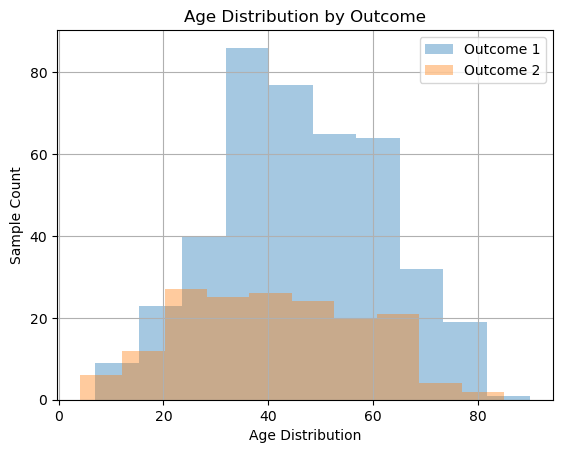

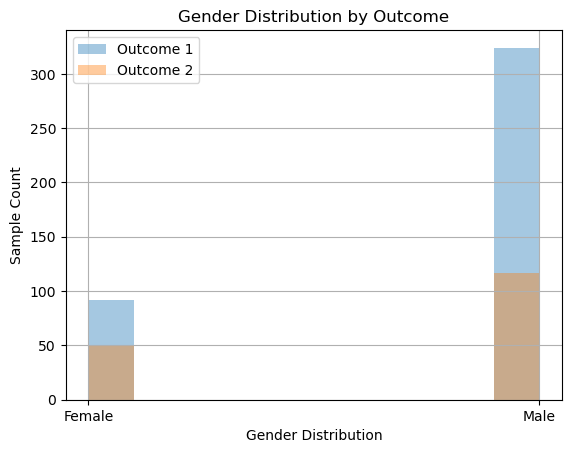

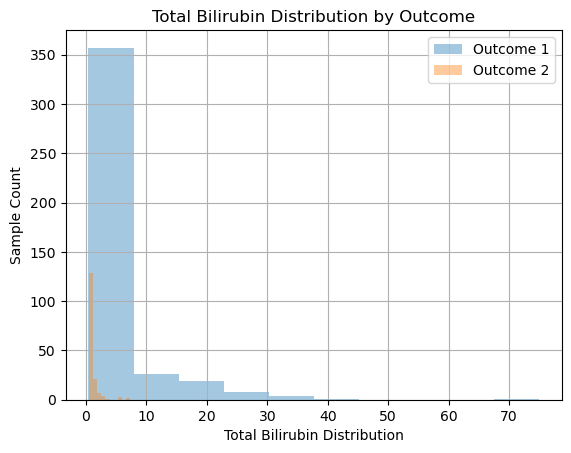

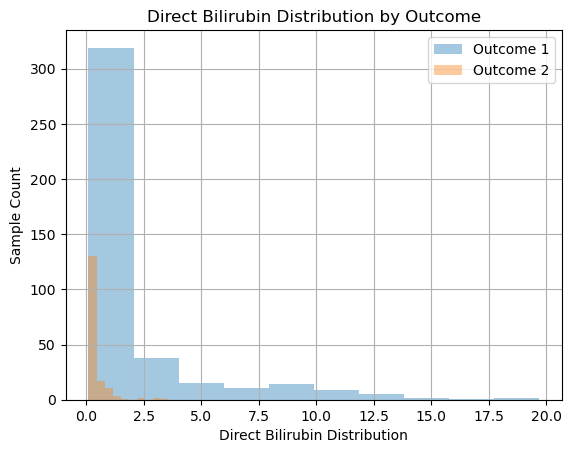

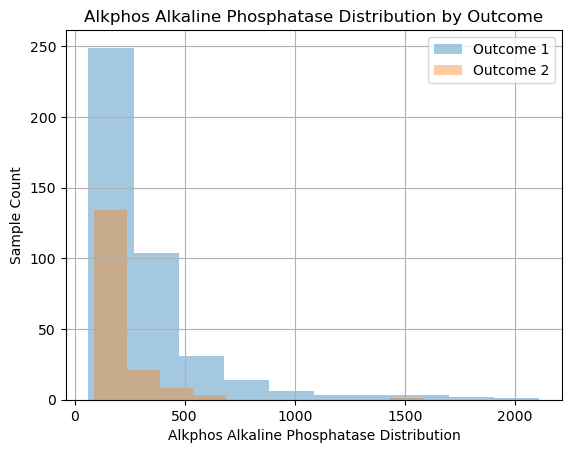

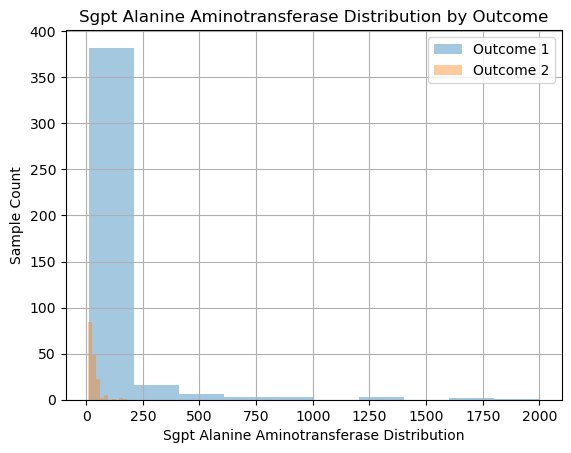

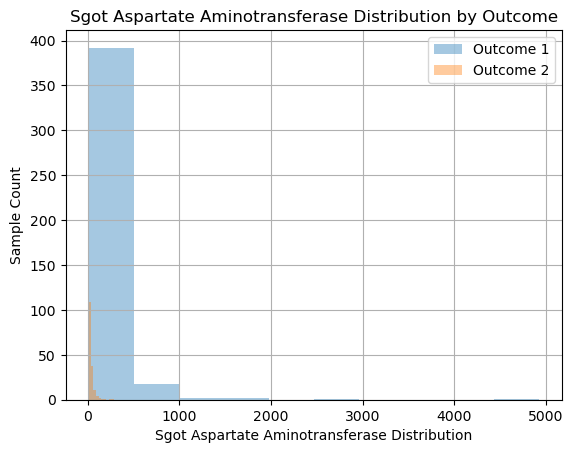

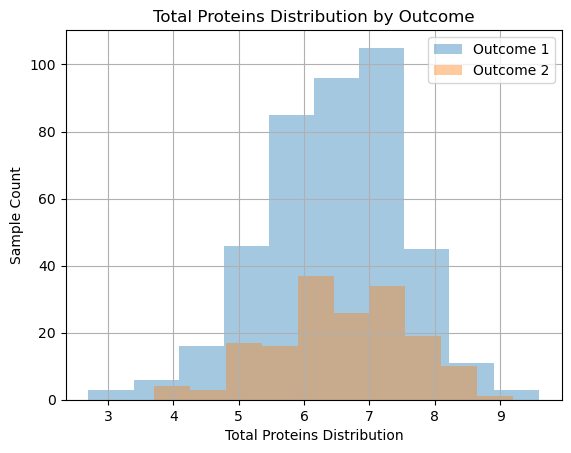

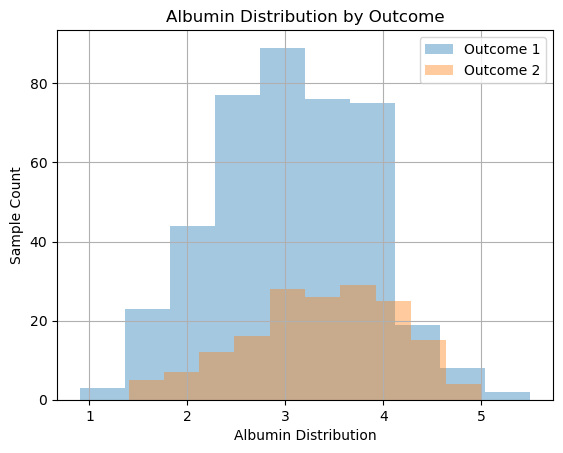

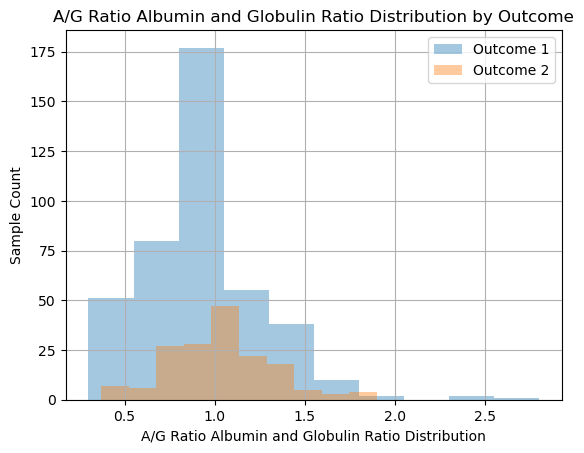

In [64]:
import matplotlib.pyplot as plt

# Loop over the column names (excluding the target variable)
for feature in liver_df.columns.drop('target'):
    # Group the DataFrame by 'Outcome' and create histograms for each feature
    liver_df.groupby('target')[feature].hist(alpha=0.4)
    plt.xlabel("{} Distribution".format(feature))
    plt.ylabel("Sample Count")
    plt.legend(['Outcome 1', 'Outcome 2'])
    plt.title("{} Distribution by Outcome".format(feature))
    plt.show()

Visually, it looks like total proteins have a different distribution between the 2 class groups